<h1>Prueba</h1>

<p style="text-indent: 20px; text-align: justify">
   Clasificar nuevos registros utilizando la técnica de k-means, mostrando porcentaje   de efectividad y también  debe buscar los atributos que se acercan a los puntos predictores (cluster centers)
</p>

<h3>Importamos las librerias que vamos a utilizar</h3>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16,15)
plt.style.use('ggplot')

<h3>Almacenamos en una variable el conjunto de datos y mostramos las primeras cinco filas</h3>

In [2]:
dataset = pd.read_csv(r'C:/Users/keireth/Desktop/apps_data/vinotinto_calidad.csv')
dataset.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h3>Con la función describe() obtemos información acerca del dataset</h3>  

In [3]:
dataset.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print(dataset.groupby('calidad').size())

calidad
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


Se observa que hay:

<ul>
    <li>10 registros con una calidad de 3</li>
    <li>53 registros con una calidad de 4</li>
    <li>681 muestras con una calidad de 5</li>
    <li>638 muestras con una calidad de 6</li>
    <li>199 muestras con una calidad de 7</li>
    <li>18 muestras con una calidad de 8</li>
</ul>

Para tener una idea de la dispersión de los datos veremos gráficamente esto.

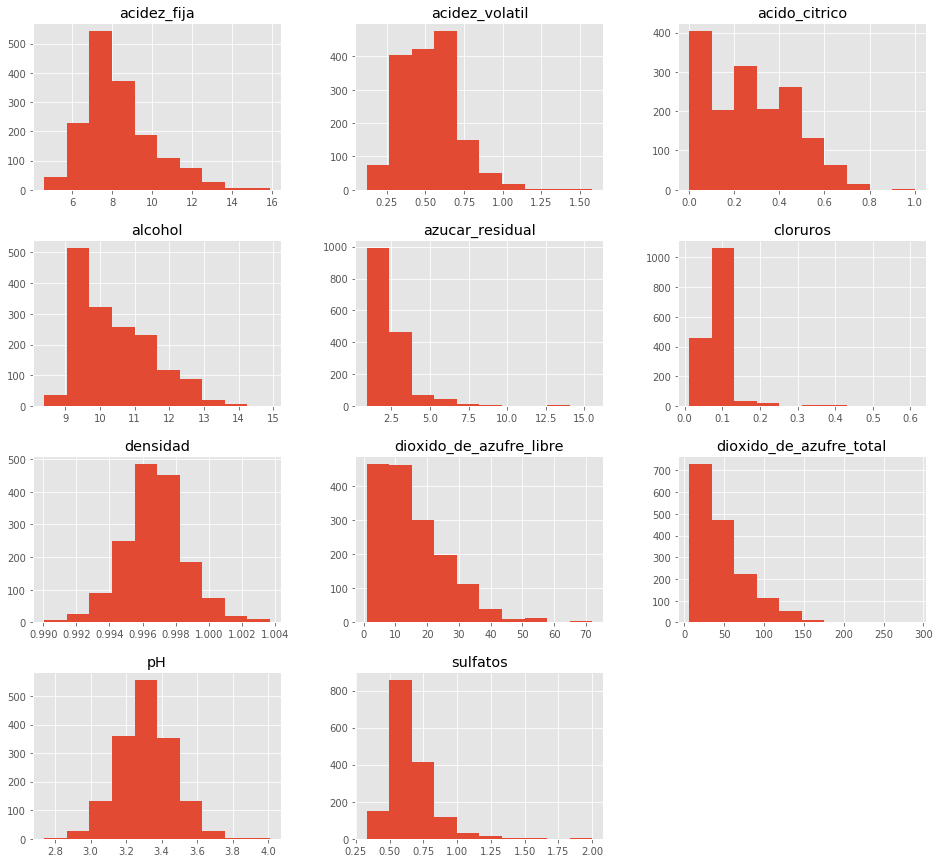

In [17]:
dataset.drop(['calidad'], 1).hist()
plt.show()

En este caso podemos seleccionar 3 dimensiones: pH, alcohol y cloruros y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con la calidad de las muestras

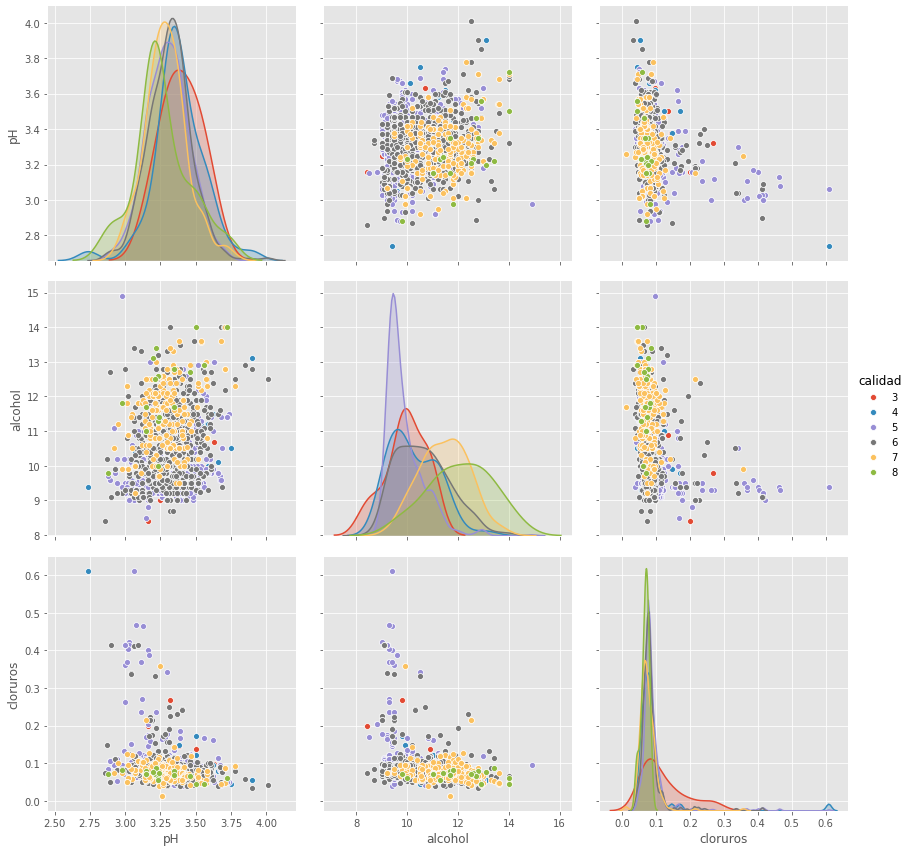

In [6]:
sb.pairplot(dataset.dropna(),
            hue='calidad', 
            height=4, 
            vars=['pH', 'alcohol', 'cloruros'],
            kind='scatter')

Observando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre las muestras y su calidad

<h3>Definimos entrada</h3>

In [7]:
x = np.array(dataset[['pH', 'alcohol', 'cloruros']])
y = np.array(dataset['calidad'])
x.shape

(1599, 3)

<h3>Gráfica 3D con 6 colores representando la calidad de las muestras</h3>

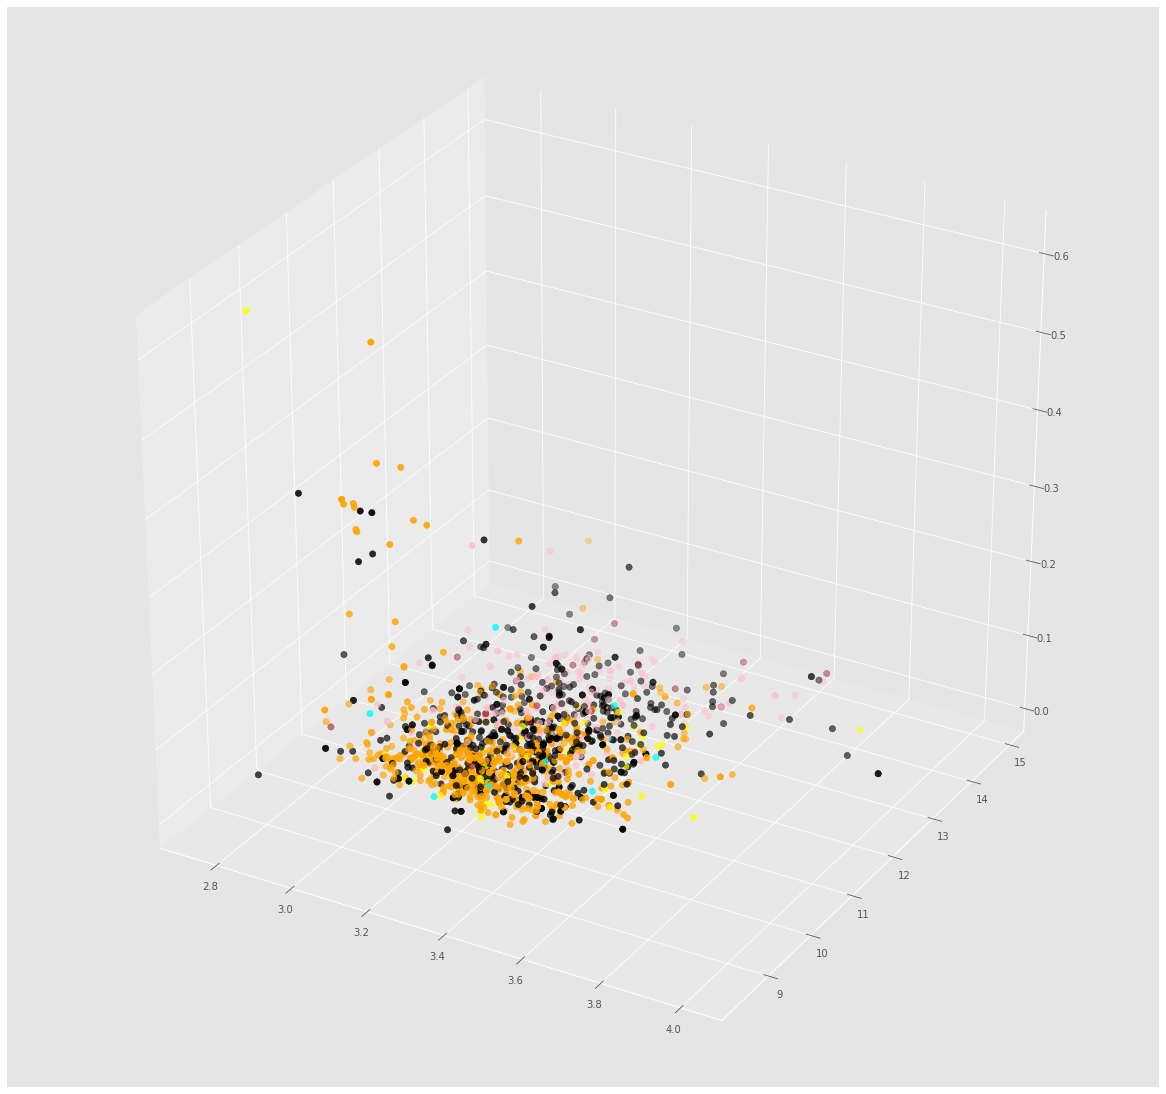

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue', 'red', 'green', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar, s=40)

<h3>Obtenemos el valor de k</h3>

<p>
    Vamos a hallar el valor de k realizando una gráfica e intentando hallar el punto de codo.
</p>

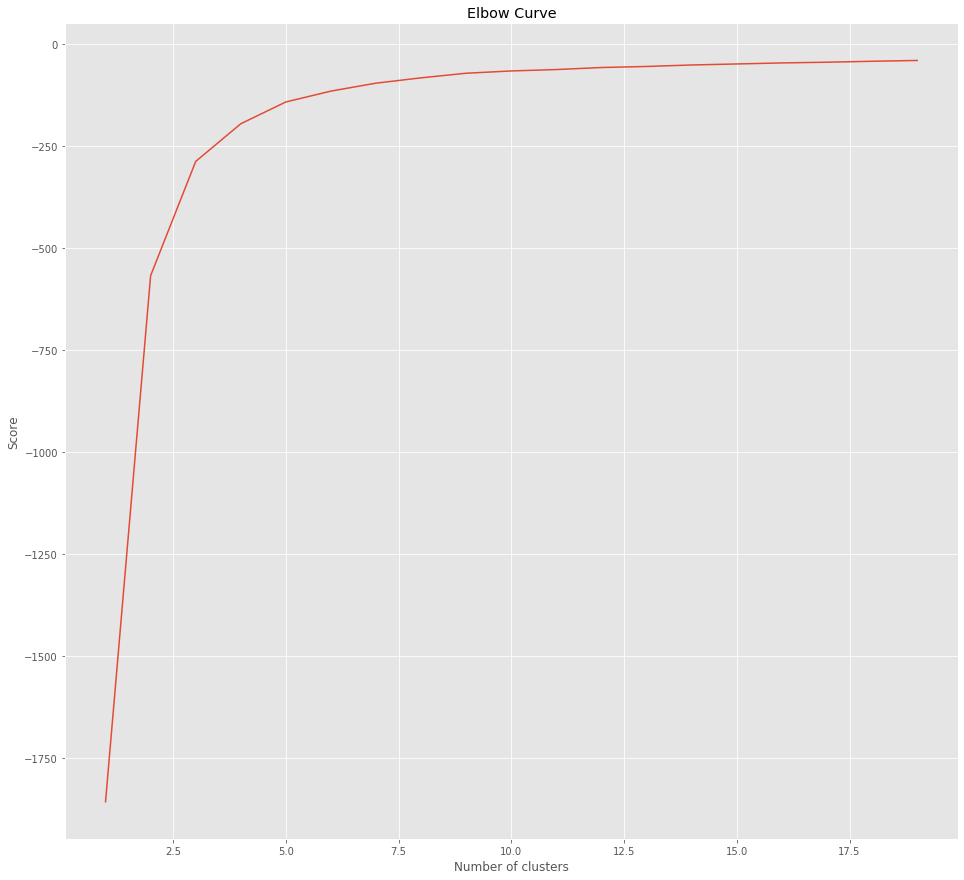

In [19]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

En mi opinión considero a 3 como un buen número para K.

<h3>Ejecutamos k-means</h3>

Ejecutamos el algoritmo para 3 clusters y obtenemos las etiquetas y los centroides

In [21]:
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.33256705 10.88777139  0.08113218]
 [ 3.28655582  9.5952692   0.09544299]
 [ 3.35144681 12.35624113  0.07295745]]


<p style="text-indent: 20px; text-align: justify">
    Aproximadamente los cluster centers se encuentran  en los puntos: (3.28, 9.59, 0.095), (3.33, 10.88, 0.081), y (3.35, 12.35, 0.072). a continuación veremos esto en una gráfica 3D con distintos colores para cada uno de los cluster y observaremos si se diferencian.
</p>

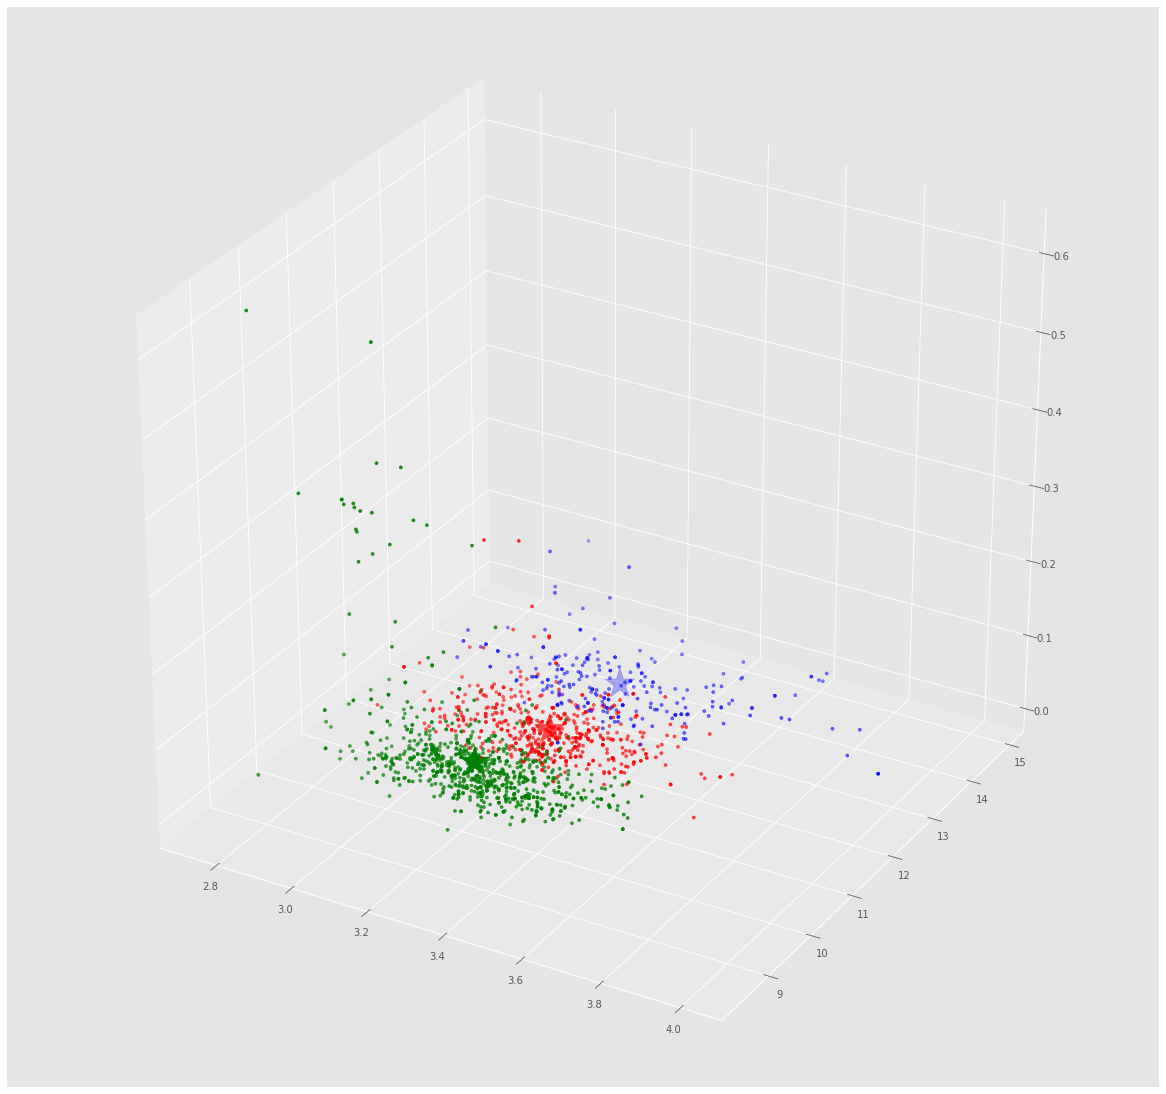

In [22]:
# Predicting the clusters
labels = kmeans.predict(x)

# Getting the cluster centers
c = kmeans.cluster_centers_

# cluster colors
colores = ['red', 'green', 'blue']

# adding the cluster colors
asignar = []
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar, s=10, zorder=1)
ax.scatter(c[:, 0], c[:, 1], c[:, 2], marker='*', c=colores, zorder=2, s=1000)

<p style="text-indent: 20px; text-align: justify">
Las estrallas representan el centro de cada uno de los clusters. above podemos observer que el algoritmo de k-means con k=3 ha agrupado a las 1599 muestras de vino por su calidad, teniendo en cuenta las tres dimensiones que utilizamos: pH, alcohol y cloruros.
</p>
<br>
Ahora podemos ver cuantas muestras de vinotinto tiene cada uno de los clusters. Entonces:

In [12]:
copy = pd.DataFrame()
copy['id'] = dataset['pH'].values
copy['calidad'] = dataset['calidad'].values
copy['label'] = labels;
cantidad_grupos = pd.DataFrame()
cantidad_grupos['color'] = colores
cantidad_grupos['cantidad'] = copy.groupby('label').size()
cantidad_grupos

,color,cantidad
0,red,842
1,green,522
2,blue,235


Cantidad de muestras en cada cluster:

<ul>
    <li>red cluster: 842 muestras de vino.</li>
    <li>green cluster: 522 muestras de vino.</li>
    <li>blue cluster: 235 muestras de vino</li>
</ul>

<h3>Clasificar nuevas muestras</h3>

Finalmente podemos agrupar y etiquetar nuevas muestras con sus características y clasificarlas, entonces:

In [13]:
x_new = np.array([[0.098, 3.98, 7.5]]) 

new_labels = kmeans.predict(x_new)
print(new_labels)

[0]
